# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_weather = pd.DataFrame(cities, columns=["City"])
cities_weather["Cloudiness"] = ""
cities_weather["Country"] = ""
cities_weather["Date"] = ""
cities_weather["Humidity"] = ""
cities_weather["Lat"] = ""
cities_weather["Lng"] = ""
cities_weather["Max Temp"] = ""
cities_weather["Wind Speed"] = ""
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,,,,,,,,
1,hobart,,,,,,,,
2,somerset,,,,,,,,
3,chuy,,,,,,,,
4,tieli,,,,,,,,


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {
    "APPID": api_key,
    "units": "imperial"
}

for index, row in cities_weather.iterrows():
    city_name = row["City"]
    params["q"] = city_name
    
    response = requests.get(url, params=params).json()

    try:
        print(f"Processing Reocrd {index}| {city_name}.")
        
        cities_weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_weather.loc[index, "Country"] = response["sys"]["country"]
        cities_weather.loc[index, "Date"] = response["dt"]
        cities_weather.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_weather.loc[index, "Lat"] = response["coord"]["lat"]
        cities_weather.loc[index, "Lng"] = response["coord"]["lon"]
        cities_weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_weather.loc[index, "Wind Speed"] = response["wind"]["speed"]

    except (KeyError, IndexError):
        print("City not found ... skipping.")
        
    print("------------")

Processing Reocrd 0| punta arenas.
------------
Processing Reocrd 1| hobart.
------------
Processing Reocrd 2| somerset.
------------
Processing Reocrd 3| chuy.
------------
Processing Reocrd 4| tieli.
------------
Processing Reocrd 5| port hardy.
------------
Processing Reocrd 6| skjervoy.
------------
Processing Reocrd 7| labuhan.
------------
Processing Reocrd 8| victoria.
------------
Processing Reocrd 9| alta floresta.
------------
Processing Reocrd 10| chapais.
------------
Processing Reocrd 11| bethel.
------------
Processing Reocrd 12| la ronge.
------------
Processing Reocrd 13| tumannyy.
City not found ... skipping.
------------
Processing Reocrd 14| rikitea.
------------
Processing Reocrd 15| anshun.
------------
Processing Reocrd 16| svetogorsk.
------------
Processing Reocrd 17| smithers.
------------
Processing Reocrd 18| khatanga.
------------
Processing Reocrd 19| mahebourg.
------------
Processing Reocrd 20| puerto ayora.
------------
Processing Reocrd 21| anqing.
----

Processing Reocrd 170| sheltozero.
------------
Processing Reocrd 171| lavrentiya.
------------
Processing Reocrd 172| manado.
------------
Processing Reocrd 173| ranau.
------------
Processing Reocrd 174| kissidougou.
------------
Processing Reocrd 175| flinders.
------------
Processing Reocrd 176| wanaka.
------------
Processing Reocrd 177| goderich.
------------
Processing Reocrd 178| fortuna.
------------
Processing Reocrd 179| tengzhou.
------------
Processing Reocrd 180| tarnos.
------------
Processing Reocrd 181| lazo.
------------
Processing Reocrd 182| los cedrales.
------------
Processing Reocrd 183| nortelandia.
------------
Processing Reocrd 184| palang.
------------
Processing Reocrd 185| karlskoga.
------------
Processing Reocrd 186| dvinskoy.
------------
Processing Reocrd 187| aklavik.
------------
Processing Reocrd 188| sao filipe.
------------
Processing Reocrd 189| coari.
------------
Processing Reocrd 190| leningradskiy.
------------
Processing Reocrd 191| merauke.


Processing Reocrd 338| shieli.
------------
Processing Reocrd 339| litein.
------------
Processing Reocrd 340| ust-nera.
------------
Processing Reocrd 341| san antero.
------------
Processing Reocrd 342| omboue.
------------
Processing Reocrd 343| alice springs.
------------
Processing Reocrd 344| ancud.
------------
Processing Reocrd 345| camacha.
------------
Processing Reocrd 346| matagami.
------------
Processing Reocrd 347| port-cartier.
------------
Processing Reocrd 348| ponta delgada.
------------
Processing Reocrd 349| grand centre.
City not found ... skipping.
------------
Processing Reocrd 350| sistranda.
------------
Processing Reocrd 351| hualmay.
------------
Processing Reocrd 352| wahran.
City not found ... skipping.
------------
Processing Reocrd 353| diu.
------------
Processing Reocrd 354| arraial do cabo.
------------
Processing Reocrd 355| san jeronimo.
------------
Processing Reocrd 356| tiquisio.
------------
Processing Reocrd 357| skalistyy.
City not found ... s

Processing Reocrd 507| vila.
------------
Processing Reocrd 508| jimeta.
------------
Processing Reocrd 509| kawalu.
------------
Processing Reocrd 510| punta alta.
------------
Processing Reocrd 511| constantine.
------------
Processing Reocrd 512| inuvik.
------------
Processing Reocrd 513| zhuhai.
------------
Processing Reocrd 514| egvekinot.
------------
Processing Reocrd 515| carballo.
------------
Processing Reocrd 516| dzilam gonzalez.
------------
Processing Reocrd 517| dourbali.
------------
Processing Reocrd 518| rafai.
------------
Processing Reocrd 519| zlitan.
------------
Processing Reocrd 520| humaita.
------------
Processing Reocrd 521| nunoa.
------------
Processing Reocrd 522| mount isa.
------------
Processing Reocrd 523| saint-augustin.
------------
Processing Reocrd 524| orimattila.
------------
Processing Reocrd 525| goalpara.
------------
Processing Reocrd 526| le port.
------------
Processing Reocrd 527| hasaki.
------------
Processing Reocrd 528| usinsk.
-----

In [5]:
cities_weather.replace('', np.nan, inplace=True)
cities_clean = cities_weather.dropna(how="any")
cities_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,40.0,CL,1.536361e+09,95.0,-53.16,-70.91,39.20,8.05
1,hobart,20.0,AU,1.536363e+09,53.0,-42.88,147.33,51.80,9.17
2,somerset,75.0,US,1.536361e+09,54.0,37.09,-84.60,84.20,4.63
3,chuy,0.0,UY,1.536364e+09,94.0,-33.69,-53.46,53.85,8.77
4,tieli,48.0,CN,1.536364e+09,98.0,46.98,128.05,48.27,8.10


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_clean.to_csv("Cities Weather Information.csv")
cities_clean.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [7]:
cities_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,40.0,CL,1.536361e+09,95.0,-53.16,-70.91,39.20,8.05
1,hobart,20.0,AU,1.536363e+09,53.0,-42.88,147.33,51.80,9.17
2,somerset,75.0,US,1.536361e+09,54.0,37.09,-84.60,84.20,4.63
3,chuy,0.0,UY,1.536364e+09,94.0,-33.69,-53.46,53.85,8.77
4,tieli,48.0,CN,1.536364e+09,98.0,46.98,128.05,48.27,8.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

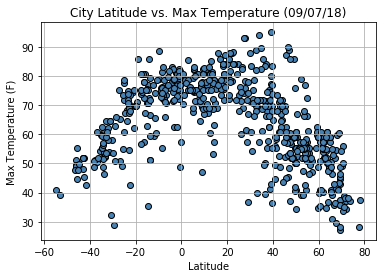

In [17]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Max Temp"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (09/07/18)")
plt.grid()

#### Latitude vs. Humidity Plot

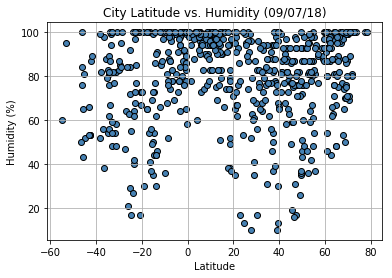

In [18]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Humidity"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (09/07/18)")
plt.grid()

#### Latitude vs. Cloudiness Plot

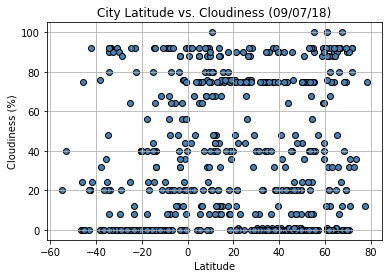

In [19]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Cloudiness"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (09/07/18)")
plt.grid()

#### Latitude vs. Wind Speed Plot

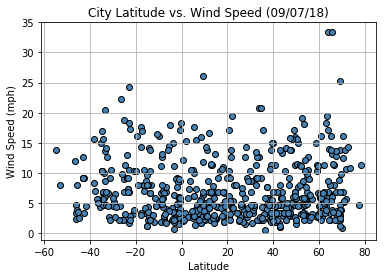

In [21]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Wind Speed"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (09/07/18)")
plt.grid()